# Video Game Sales Prediction

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\csv file\video_games_sales.csv")

In [4]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- **The most likely output feature** is **global_sales**, as it represents the total sales across all regions.
  - **na_sales**: North America sales
  - **eu_sales**: Europe sales
  - **jp_sales**: Japan sales



In [5]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Data Cleaning

In [7]:
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [8]:
df['year'] = df['year'].fillna(df['year'].median())

In [9]:
df['publisher'] = df['publisher'].fillna('Unknown')

In [10]:
df.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

# Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_7316\3665830251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='genre', palette='viridis', order=df['genre'].value_counts().index)


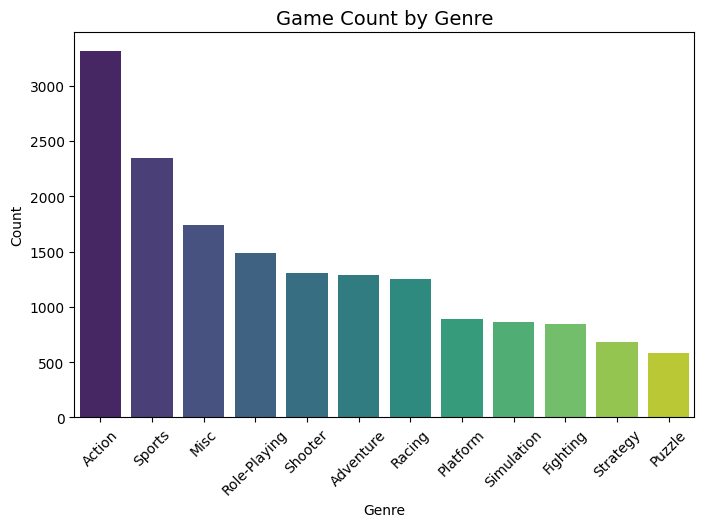

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='genre', palette='viridis', order=df['genre'].value_counts().index)
plt.title('Game Count by Genre', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


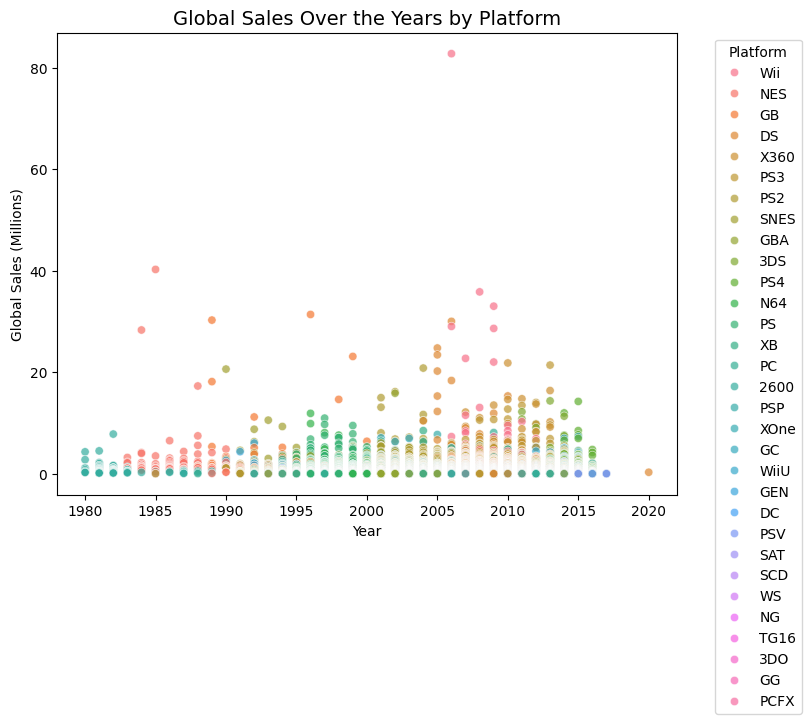

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='year', y='global_sales', hue='platform', alpha=0.7)
plt.title('Global Sales Over the Years by Platform', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


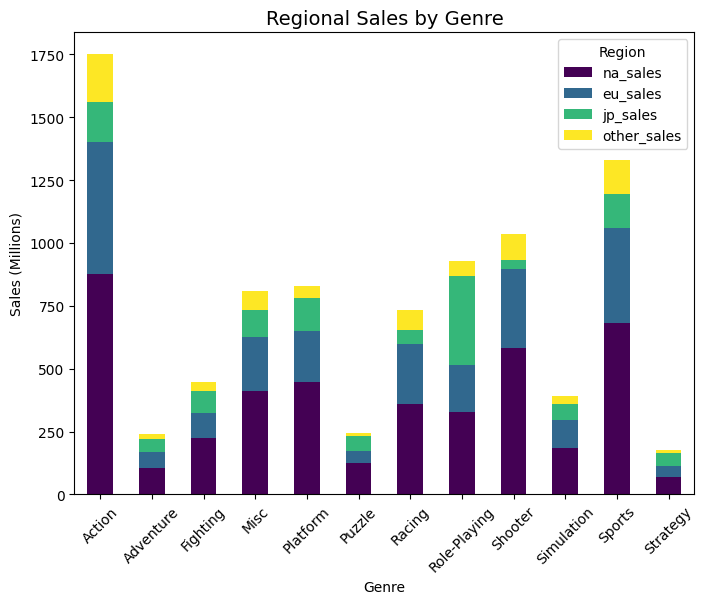

In [14]:
regional_sales_by_genre = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

regional_sales_by_genre.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Regional Sales by Genre', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder
label_columns = ['name','platform','genre','publisher']
label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,11007,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


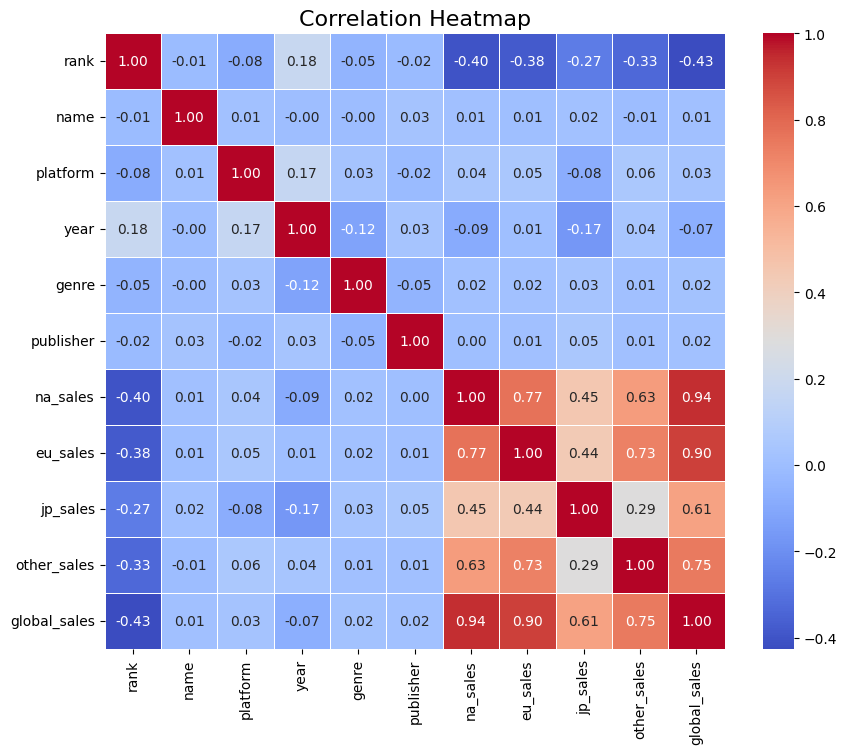

In [17]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

## Apply Linear Regression model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X=df.drop(columns=['global_sales'])
y=df['global_sales']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)

(13278, 10)
(3320, 10)


In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [23]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9999879971733702


In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.6873513025643328e-05


### Conclusion

The R-squared value of **0.99999** indicates an excellent fit, with the model explaining nearly all the variance in global video game sales. The extremely low Mean Squared Error of **2.69e-05** demonstrates high predictive accuracy. These results suggest the model is highly reliable for predicting sales based on the given features.


In [32]:
y_test

1586     1.25
5368     0.34
6275     0.27
9130     0.14
5759     0.31
        ...  
1911     1.08
4944     0.39
4110     0.48
5291     0.35
7       29.02
Name: global_sales, Length: 3320, dtype: float64

In [31]:
y_pred

array([ 1.24946213,  0.34991642,  0.28016676, ...,  0.47974229,
        0.35003861, 29.00933468])